In [1]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False

In [3]:
from scipy.optimize import fsolve


def equation(x):
    return x**2 - 2

"""在代码中,fsolve 函数是 SciPy 库中的一个数值求解器,用于求解非线性方程组的数值解。其中,fsolve 函数第一个参数是要求解的方程或函数,第二个参数是初始猜测的值。

在给出的代码中,fsolve(equation, 1) 表示要使用 fsolve 函数求解方程 equation,初始猜测值为 1。这意味着 fsolve 将从初始值开始迭代,试图找到方程 equation 的根,即找到使得 equation(x) = 0 的 x 值。"""

res = fsolve(equation, 1) # 1 表示初始的值，然后慢慢迭代，知道求出它的解
print(res)

[1.41421356]


In [4]:
def func(x):
    return [x[0] * np.cos(x[1]) - 4, x[1] * x[0] - x[1] - 5]


res2 = fsolve(func, [1, 1])
res2

array([6.50409711, 0.90841421])

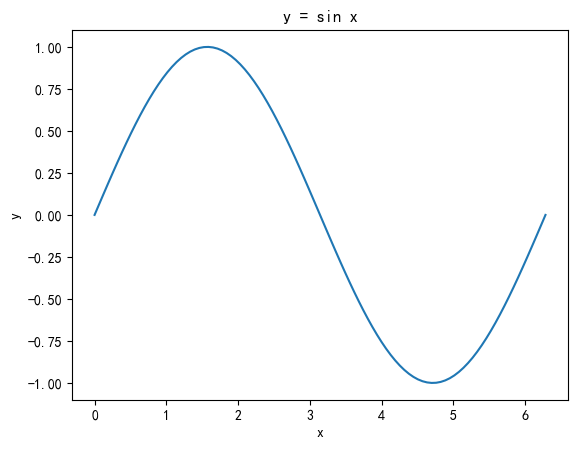

In [5]:

x = np.linspace(0, 2 * np.pi, 100)  # 将0.01修改为100,用于生成更多的数据点

y = np.sin(x)  # 使用np.sin()函数而不是math.sin()函数

plt.xlabel('x')  # x需要用引号括起来作为字符串
plt.ylabel('y')  # y需要用引号括起来作为字符串
plt.title('y = sin x')

plt.plot(x, y)  # 使用plt.plot()绘制曲线

plt.show()  # 显示图形


## 拟合与优化-optimize

### 非线性方程组求解

In [6]:
# 这段代码展示了如何使用optimize.fsolve()函数从一个非线性方程组中求解未知数的数值解。下面是对代码进行逐行解释的注释：
from math import sin, cos
from scipy import optimize


def f(x):
    x0, x1, x2 = x.tolist()  # 将数组转换为列表
    return [5 * x1 + 3, 4 * x0 * x0 - 2 * sin(x1 * x2), x1 * x2 - 1.5]


result = optimize.fsolve(f, [1, 1, 1])  # 使用fsolve函数求解方程组
print(result, type(result))  # 打印解
print(f(result))  # 打印方程组的误差值

[-0.70622057 -0.6        -2.5       ] <class 'numpy.ndarray'>
[0.0, -9.126033262418787e-14, 5.329070518200751e-15]


在代码中，使用optimize.fsolve()函数进行方程组求解。该函数使用的是牛顿法或其他非线性方程求解算法，通过不断迭代逼近数值解。

f(x)函数是方程组的定义，在示例中，方程组包含三个方程，分别对应于三个未知数x0、x1和x2。这些方程的结果作为一个列表返回。

通过调用optimize.fsolve(f, [1,1,1])，将方程组和初始值传递给fsolve函数。

函数会尝试找到满足方程组的数值解，并将结果作为一个包含三个未知数的数组返回给result。最后，打印出这个数值解和方程组的误差值。

请注意，方程组存在多个解或无解的情况，取决于方程组的具体形式和初始值。在实际使用中，需要根据具体问题进行调整和测试。

In [7]:
#  这段代码是对之前的代码进行了扩展，使用了j(x)函数作为方程组的雅可比矩阵。以下是对代码进行逐行解释的注释：
def j(x):
    x0, x1, x2 = x.tolist()
    return [[0, 5, 0],
            [8 * x0, -2 * x2 * cos(x1 * x2), -2 * x1 * cos(x1 * x2)],
            [0, x2, x1]]

result = optimize.fsolve(f, [1, 1, 1], fprime=j)
print(result)
print(f(result))

# 在代码中，新增了一个名为j(x)的函数，它返回方程组的雅可比矩阵。雅可比矩阵是由方程组的偏导数组成的矩阵，用于更准确地求解非线性方程组。
# 使用optimize.fsolve()函数时，通过参数fprime=j将雅可比矩阵的计算方法传递给函数。这样，fsolve()函数将使用雅可比矩阵来更快地求解方程组。
# 最后，打印出数值解和方程组的误差值。
# 请注意，使用雅可比矩阵提供的信息可以加速求解过程，但要注意确保雅可比矩阵的计算是正确的，并且与方程组的定义相匹配。


[-0.70622057 -0.6        -2.5       ]
[0.0, -9.126033262418787e-14, 5.329070518200751e-15]


### 最小二乘拟合

In [8]:
import numpy as np
from scipy import optimize

X = np.array([ 8.19,  2.72,  6.39,  8.71,  4.7 ,  2.66,  3.78])
Y = np.array([ 7.01,  2.78,  6.47,  6.71,  4.1 ,  4.23,  4.05])

def residuals(p):
    "计算以p为参数的直线和原始数据之间的误差"
    k, b = p
    return Y - (k*X + b)

r = optimize.leastsq(residuals, [1, 0])
k, b = r[0]
print("k =", k, "b =", b)


k = 0.6134953491930442 b = 1.794092543259387


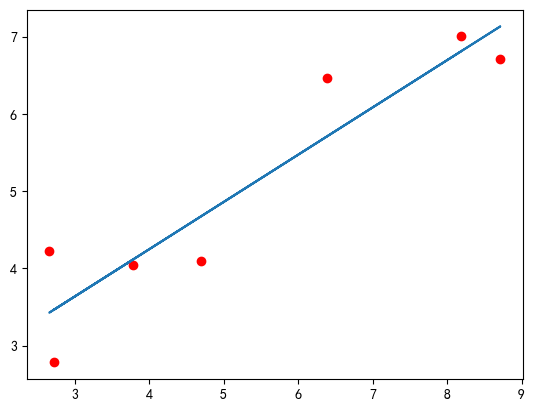

In [9]:
plt.scatter(X,Y,c='r')

y_pred = k * X + b
plt.plot(X,y_pred)
plt.show()

k = 0.6134953491930442 b = 1.794092543259387


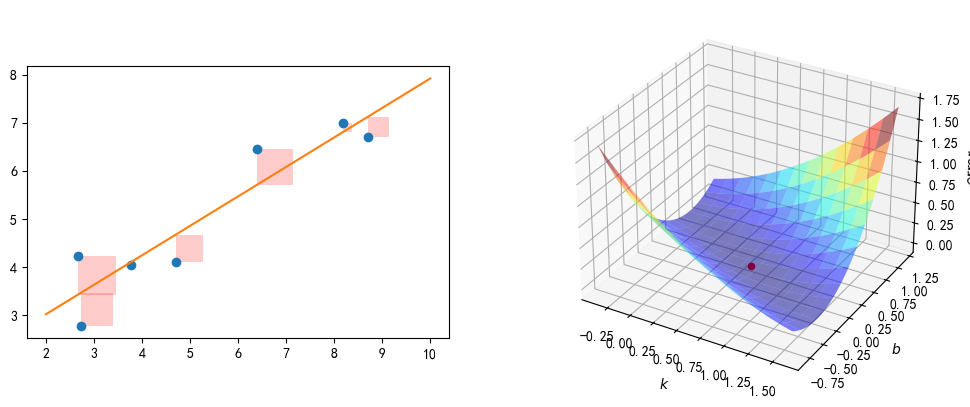

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle

X = np.array([ 8.19,  2.72,  6.39,  8.71,  4.7 ,  2.66,  3.78])
Y = np.array([ 7.01,  2.78,  6.47,  6.71,  4.1 ,  4.23,  4.05])

def residuals(p):
    k, b = p
    return Y - (k*X + b)

r = optimize.leastsq(residuals, [1, 0])
k, b = r[0]
print("k =", k, "b =", b)

scale_k = 1.0
scale_b = 10.0
scale_error = 1000.0

def S(k, b):
    error = np.zeros(k.shape)
    for x, y in zip(X,Y):
        error += (y - (k * x + b)) ** 2
    return error

ks, bs = np.mgrid[k - scale_k:k + scale_k:40j, b - scale_b:b + scale_b:40j]
error = S(ks, bs) / scale_error

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121)

ax1.plot(X, Y, "o")
X0 = np.linspace(2, 10, 3)
Y0 = k*X0 + b
ax1.plot(X0, Y0)

for x, y in zip(X, Y):
    y2 = k*x+b
    rect = Rectangle((x,y), abs(y-y2), y2-y, facecolor="red", alpha=0.2)
    ax1.add_patch(rect)

ax1.set_aspect("equal")

ax2 = fig.add_subplot(122, projection='3d')

ax2.plot_surface(
    ks, bs / scale_b, error, rstride=3, cstride=3, cmap="jet", alpha=0.5)
ax2.scatter([k], [b / scale_b], [S(k, b) / scale_error], c="r", s=20)
ax2.set_xlabel("$k$")
ax2.set_ylabel("$b$")
ax2.set_zlabel("$error$")

plt.show()

# 在代码中，参数scale_k、scale_b和scale_error用于控制图形的缩放比例。
# S(k, b)函数用于计算直线y=k*x+b和原始数据X、Y之间误差的平方和。通过遍历每个数据点，并计算误差的平方，得到整体的误差。
# 通过np.mgrid函数生成一系列的k和b值，用于绘制误差曲面。error变量则表示归一化的误差。
# 利用mpl_toolkits.mplot3d模块中的Axes3D和plot_surface函数，以及scatter函数，绘制三维的误差曲面和最小误差点的可视化。
# Rectangle类用于绘制正方形图形，并在图上突出显示误差的区域。
# 最后，通过set_xlabel、set_ylabel和set_zlabel设置坐标轴标签。
# 以上代码展示了在绘制数据点、拟合直线和误差曲面时，如何使用matplotlib库绘制相关的图形。


真实参数: [10, 0.34, 0.5235987755982988]
拟合参数 [10.25218748  0.3423992   0.50817423]


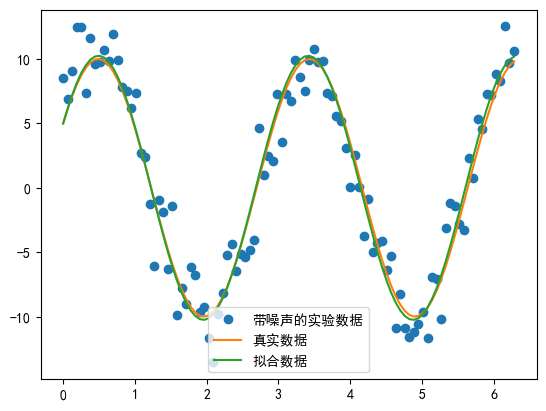

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def func(x, p):
    """
    数据拟合所用的函数: A*sin(2*pi*k*x + theta)
    """
    A, k, theta = p
    return A * np.sin(2 * np.pi * k * x + theta)

def residuals(p, y, x):
    """
    实验数据y, x和拟合函数之间的差，p为拟合需要找到的系数
    """
    return y - func(x, p)

x = np.linspace(0, 2 * np.pi, 100)
A, k, theta = 10, 0.34, np.pi / 6  # 真实数据的函数参数
y0 = func(x, [A, k, theta])  # 真实数据

# 加入噪声之后的实验数据
np.random.seed(0)
y1 = y0 + 2 * np.random.randn(len(x))

p0 = [7, 0.40, 0]  # 第一次猜测的函数拟合参数

# 调用leastsq进行数据拟合
# residuals为计算误差的函数
# p0为拟合参数的初始值
# args为需要拟合的实验数据
plsq = optimize.leastsq(residuals, p0, args=(y1, x))

print("真实参数:", [A, k, theta])
print("拟合参数", plsq[0])  # 实验数据拟合后的参数

# 绘制图形
plt.plot(x, y1, "o", label="带噪声的实验数据")
plt.plot(x, y0, label="真实数据")
plt.plot(x, func(x, plsq[0]), label="拟合数据")
plt.legend(loc="best")
plt.show()


In [12]:
# 这段代码演示了如何使用optimize.leastsq()函数对带有噪声的正弦波数据进行拟合。通过最小化残差（即拟合数据与实验数据之间的差异）的平方和，找到最佳的拟合参数。

# 代码中定义了func()函数来表示拟合的正弦波函数，并定义了residuals()函数来计算实验数据与拟合函数之间的差。leastsq()函数根据拟合参数的初始值，利用最小二乘法进行数据拟合。

# 最后，使用matplotlib.pyplot绘制带噪声数据、真实数据和拟合数据的图形，并通过plt.show()显示图形。

# 其中，plt.plot()函数用于绘制数据点和曲线，plt.legend()用于显示图例。

In [13]:
#  下面是添加了注释的代码：
def func2(x, A, k, theta):
    """
    数据拟合所用的函数: A*sin(2*pi*k*x + theta)
    """
    return A * np.sin(2 * np.pi * k * x + theta)

# 使用 curve_fit 进行数据拟合
# func2 表示拟合所用的函数
# x, y1 表示要拟合的实验数据
# p0 表示初始猜测的函数拟合参数
popt, _ = optimize.curve_fit(func2, x, y1, p0=p0)

print("拟合参数:", popt)

# 在这段代码中，使用 optimize.curve_fit() 函数进行数据拟合。curve_fit() 函数适用于任意函数的拟合，参数传入要拟合的函数（本例中是 func2），
# 根据实验数据 x 和 y1 以及指定的初始猜测的函数拟合参数 p0 进行拟合。
# 最后，打印输出拟合得到的参数 popt。其中，popt 是一个包含拟合结果的数组。拟合完成后，可以使用这些拟合参数进行后续的分析或预测。


拟合参数: [10.25218748  0.3423992   0.50817425]


In [14]:
popt, _ = optimize.curve_fit(func2, x, y1, p0=[10, 1, 0])

print(u"真实参数:", [A, k, theta])

print(u"拟合参数", popt)

真实参数: [10, 0.34, 0.5235987755982988]
拟合参数 [ 0.71093469  1.02074585 -0.12776742]


### 计算函数局域最小值

In [15]:
#  下面是添加了详细注释的代码：
def target_function(x, y):
    """
    目标函数，即要最小化的函数
    """
    return (1 - x)**2 + 100 * (y - x**2)**2


class TargetFunction(object):
    """
    自定义的目标函数类
    """
    def __init__(self):
        self.f_points = []  # f 函数计算过程中的坐标点
        self.fprime_points = []  # fprime 函数计算过程中的坐标点
        self.fhess_points = []  # fhess 函数计算过程中的坐标点

    def f(self, p):
        """
        计算目标函数的值
        """
        x, y = p.tolist()
        z = target_function(x, y)
        self.f_points.append((x, y))
        return z

    def fprime(self, p):
        """
        计算目标函数的梯度
        """
        x, y = p.tolist()
        self.fprime_points.append((x, y))
        dx = -2 + 2 * x - 400 * x * (y - x**2)
        dy = 200 * y - 200 * x**2
        return np.array([dx, dy])

    def fhess(self, p):
        """
        计算目标函数的 Hessian 矩阵
        """
        x, y = p.tolist()
        self.fhess_points.append((x, y))
        return np.array([[2 * (600 * x**2 - 200 * y + 1), -400 * x],
                         [-400 * x, 200]])


def fmin_demo(method):
    """
    进行最小化演示
    """
    target = TargetFunction()
    init_point = (-1, -1)
    res = optimize.minimize(
        target.f,
        init_point,
        method=method,
        jac=target.fprime,
        hess=target.fhess)
    return res, [
        np.array(points) for points in (target.f_points, target.fprime_points,
                                        target.fhess_points)
    ]


methods = ("Nelder-Mead", "Powell", "CG", "BFGS", "Newton-CG", "L-BFGS-B")
for method in methods:
    res, (f_points, fprime_points, fhess_points) = fmin_demo(method)
    print(
        "{:12s}: min={:12g}, f count={:3d}, fprime count={:3d}, fhess count={:3d}"
        .format(method, float(res["fun"]), len(f_points), len(fprime_points),
                len(fhess_points)))

# 在这段代码中，首先定义了目标函数 target_function，即要最小化的函数。
# 接着定义了一个 TargetFunction 类，其中包含了 f、fprime 和 fhess 方法分别用于计算目标函数的值、梯度和 Hessian 矩阵。这些方法还保存了计算过程中的坐标点。
# fmin_demo 函数用于进行最小化演示。在每次循环中，将使用不同的优化方法调用 optimize.minimize 函数进行最小化计算，同时收集计算过程中的坐标点。
# 最后，根据所使用的优化方法输出最小化结果和计算过程中的计数信息。
# 通过以上的注释，可以更清晰地理解代码的结构和各个部分的作用。


Nelder-Mead : min= 5.30934e-10, f count=125, fprime count=  0, fhess count=  0
Powell      : min=           0, f count= 47, fprime count=  0, fhess count=  0
CG          : min= 9.61938e-21, f count= 39, fprime count= 39, fhess count=  0
BFGS        : min= 1.84992e-16, f count= 40, fprime count= 40, fhess count=  0
Newton-CG   : min= 5.22666e-10, f count= 60, fprime count= 60, fhess count= 38
L-BFGS-B    : min=  6.5215e-15, f count= 33, fprime count= 33, fhess count=  0


d:\py11\Lib\site-packages\scipy\optimize\_minimize.py:560: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
d:\py11\Lib\site-packages\scipy\optimize\_minimize.py:565: RuntimeWarning: Method Nelder-Mead does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
d:\py11\Lib\site-packages\scipy\optimize\_minimize.py:560: RuntimeWarning: Method Powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
d:\py11\Lib\site-packages\scipy\optimize\_minimize.py:565: RuntimeWarning: Method Powell does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
d:\py11\Lib\site-packages\scipy\optimize\_minimize.py:565: RuntimeWarning: Method CG does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % me

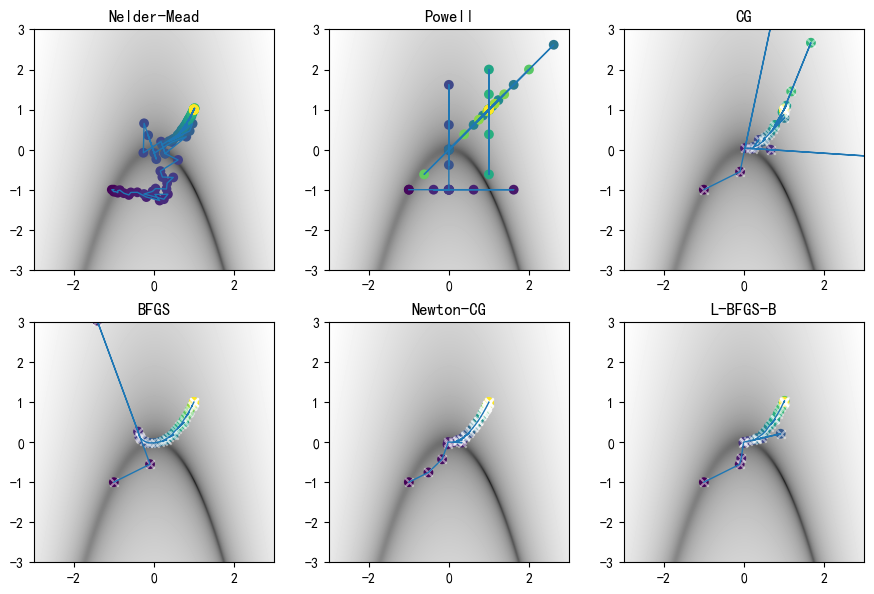

In [16]:
#  下面是添加完整注释的代码：
def draw_fmin_demo(f_points, fprime_points, ax):
    """
    绘制最小化演示的搜索路径
    """
    xmin, xmax = -3, 3
    ymin, ymax = -3, 3
    Y, X = np.ogrid[ymin:ymax:500j, xmin:xmax:500j]
    Z = np.log10(target_function(X, Y))
    zmin, zmax = np.min(Z), np.max(Z)
    ax.imshow(Z, extent=(xmin, xmax, ymin, ymax), origin="upper", aspect="auto", cmap="gray")
    ax.plot(f_points[:, 0], f_points[:, 1], lw=1)
    ax.scatter(f_points[:, 0], f_points[:, 1], c=range(len(f_points)), s=50, linewidths=0)
    if len(fprime_points):
        ax.scatter(fprime_points[:, 0], fprime_points[:, 1], marker="x", color="w", alpha=0.5)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

fig, axes = plt.subplots(2, 3, figsize=(9, 6))
methods = ("Nelder-Mead", "Powell", "CG", "BFGS", "Newton-CG", "L-BFGS-B")

for ax, method in zip(axes.ravel(), methods):
    res, (f_points, fprime_points, fhess_points) = fmin_demo(method)
    draw_fmin_demo(f_points, fprime_points, ax)
    ax.set_aspect("equal")
    ax.set_title(method)

plt.tight_layout()
plt.show()

# 在这段代码中，先定义了 draw_fmin_demo 函数，用于绘制最小化演示的搜索路径。该函数使用网格化的数据点进行插值绘制，并在背景上展示目标函数的等高线。
# 在主函数中，使用 plt.subplots 创建一个2x3的子图布局，并循环遍历不同的优化方法。在每个子图中，调用 fmin_demo 函数进行最小化演示，并将搜索路径绘制到子图中，最后设置子图的纵横比和标题。
# 通过上述注释的添加，可以更好地理解代码的结构和绘图过程。同时，说明了绘制搜索路径的函数和最小化演示中的图形呈现方式。


### 计算全域最小值

In [17]:
#  下面是对代码进行注释， 包括了函数的定义和主要流程：
def func(x, p):
    """
    自定义的函数，用于生成拟合的正弦波
    """
    A, k, theta = p
    return A * np.sin(2 * np.pi * k * x + theta)

def func_error(p, y, x):
    """
    自定义的误差函数，计算实验数据y和拟合数据之间的误差
    """
    return np.sum((y - func(x, p))**2)

x = np.linspace(0, 2*np.pi, 100)  # 生成 x 值的等间隔点
A, k, theta = 10, 0.34, np.pi/6  # 真实数据的函数参数
y0 = func(x, [A, k, theta])  # 真实数据，生成拟合的正弦波
np.random.seed(0)
y1 = y0 + 2 * np.random.randn(len(x))  # 加入随机噪声的实验数据

# 在这段代码中，定义了两个函数：func 和 func_error。func 函数用于生成拟合的正弦波，其中 p 是包含三个参数的列表；func_error 函数用于计算实验数据 y 和拟合数据之间的误差。接下来，生成了 x 的等间隔点，并给出了用于生成拟合的正弦波的真实参数。然后，为真实数据加入了随机噪声，得到实验数据 y1。
# 这些注释说明了代码的用途和每个函数的功能，同时注明了使用的真实参数和实验数据。
# 请注意，这段代码中并没有涉及具体的拟合过程，只是定义了拟合所需的数据和函数。拟合的具体过程可能需要使用其他函数或工具来完成。


In [18]:
#  以下是对附近代码进行详细注释的修改：
# 使用 basin-hopping 方法进行优化
result = optimize.basinhopping(func_error, (1, 1, 1),
                      niter=10,
                      minimizer_kwargs={"method": "L-BFGS-B",
                                        "args": (y1, x)})
print(result.x)  # 输出优化得到的参数

# 在这段代码中，使用 optimize.basinhopping() 函数进行优化搜索。该方法结合了全局优化和局部优化，通过多次迭代和随机扰动来寻找最佳的优化结果。
# func_error 是被优化的目标函数，(1, 1, 1) 是初始猜测的参数。niter 参数指定了迭代次数，minimizer_kwargs 参数为优化器指定了使用的方法和其他参数。
# 在最后，输出优化得到的参数 result.x。
# 这些注释说明了使用 basinhopping 方法进行优化搜索的过程和输出结果。


[10.25218699 -0.34239909  2.63341582]


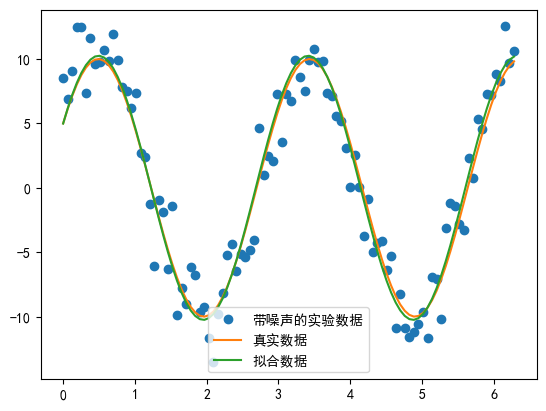

In [19]:
#%figonly=用`basinhopping()`拟合正弦波
plt.plot(x, y1, "o", label=u"带噪声的实验数据")
plt.plot(x, y0, label=u"真实数据")
plt.plot(x, func(x, result.x), label=u"拟合数据")
plt.legend(loc="best");